## Observations and Insights 

In [ ]:
# The mean tumor volumes for Capomulin and Ramicane were significantly lower than the other drugs.
# Infubinol had 1 outlier, close to the mean of Capomulin and Ramicane.
# The more the rat weighs, the bigger its tumor will be.

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
MouseStudywithDupes_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
MouseStudywithDupes_df.head(200)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
195,i738,Capomulin,Female,23,20,0,45.000000,0
196,i738,Capomulin,Female,23,20,5,45.595685,0
197,i738,Capomulin,Female,23,20,10,43.421014,0
198,i738,Capomulin,Female,23,20,15,37.978778,0


In [54]:
# Checking the number of mice.
MiceCount = len(MouseStudywithDupes_df["Mouse ID"].unique())
MiceCount

249

In [55]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
MouseStudywithDupes_df["Duplicate?"] = MouseStudywithDupes_df.duplicated(["Mouse ID","Timepoint"])
MouseStudywithDupes_df

DuplicatedMouseId = MouseStudywithDupes_df.loc[MouseStudywithDupes_df.duplicated(subset=['Mouse ID','Timepoint']),
                                                 'Mouse ID'].unique()
DuplicatedMouseId

array(['g989'], dtype=object)

In [56]:
# Optional: Get all the data for the duplicate mouse ID. 
df = MouseStudywithDupes_df.set_index("Mouse ID")
DupeData = df.loc[DuplicatedMouseId,:]
DupeData

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate?
Mouse ID,,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0,False
g989,Propriva,Female,21,26,0,45.000000,0,True
g989,Propriva,Female,21,26,5,48.786801,0,False
g989,Propriva,Female,21,26,5,47.570392,0,True
g989,Propriva,Female,21,26,10,51.745156,0,False
g989,Propriva,Female,21,26,10,49.880528,0,True
g989,Propriva,Female,21,26,15,51.325852,1,False
g989,Propriva,Female,21,26,15,53.442020,0,True
g989,Propriva,Female,21,26,20,55.326122,1,False


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_df = df.drop(index=DuplicatedMouseId).drop(columns="Duplicate?")

In [58]:
# Checking the number of mice in the clean DataFrame.
Clean_df['Mouse ID'] = Clean_df.index
Clean_df
MiceCountClean = len(Clean_df["Mouse ID"].unique())
MiceCountClean

248

## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
Clean_df
SummaryStatistics_df = pd.DataFrame({"Mean":Clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean().map("{:.2f}".format),
                         "Median":Clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median().map("{:.2f}".format),
                         "Variance":Clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var().map("{:.2f}".format),
                         "Standard Deviation":Clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std().map("{:.2f}".format),
                         "SEM":Clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem().map("{:.2f}".format)})
SummaryStatistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

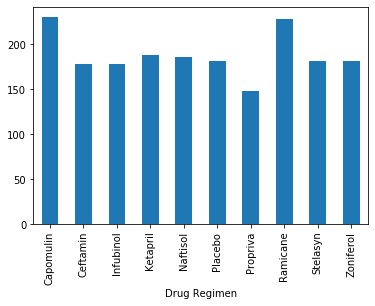

In [61]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Clean_df.groupby(["Drug Regimen"]).count()["Sex"].plot.bar()

([<matplotlib.axis.XTick at 0x2da64b21688>,
 <a list of 10 Text xticklabel objects>)

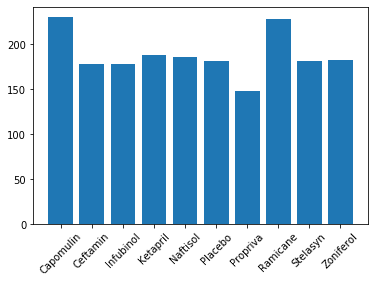

In [62]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
y = Clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
x = np.arange(len(Clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]))
plt.bar(x,y)
#tickmarks = value for value at x
treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
tick_locations = [value for value in x]
plt.xticks(tick_locations, treatments, rotation=45)
#name them

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64


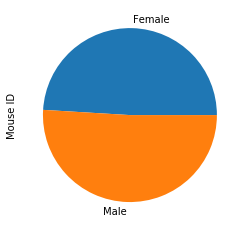

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
GenderDistribution = mouse_metadata.groupby(["Sex"]).count()["Mouse ID"]
print(GenderDistribution)
PieGender = Clean_df.groupby(["Sex"]).count()["Mouse ID"].plot.pie()
PieGender
#248

([<matplotlib.patches.Wedge at 0x2da652299c8>,
 [Text(0.006939175976765795, 1.0999781124353174, ''),
  Text(-0.006939175976765929, -1.0999781124353174, '')])

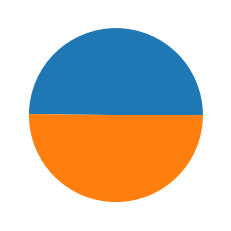

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(GenderDistribution)


## Quartiles, Outliers and Boxplots

In [65]:
# # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin
# # Start by getting the last (greatest) timepoint for each mouse
Quartiles = df.drop(index=DuplicatedMouseId)
Quartiles
# HighestTimepoint = Quartiles.groupby(['Drug Regimen','Mouse ID',]).max()["Timepoint"]
# #TryAgain = HighestTimepoint.append(Quartiles["Tumor Volume (mm3)"])
# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# #TumorVolume = pd.merge(mouse_metadata, groupby, on="Mouse ID")
# HighestTimepoint

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate?
Mouse ID,,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0,False
k403,Ramicane,Male,21,16,5,38.825898,0,False
k403,Ramicane,Male,21,16,10,35.014271,1,False
k403,Ramicane,Male,21,16,15,34.223992,1,False
k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2,False
z969,Naftisol,Male,9,30,30,65.841013,3,False
z969,Naftisol,Male,9,30,35,69.176246,4,False


In [66]:
HighestTimepoint = Quartiles.groupby(["Mouse ID"]).max()["Timepoint"]
HighestTimepoint = HighestTimepoint.reset_index()

merged_data = HighestTimepoint.merge(Quartiles, on=["Mouse ID", "Timepoint"], how="left").drop(columns="Duplicate?")
merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [67]:
FourDrugs = merged_data[(merged_data["Drug Regimen"]=='Capomulin')|
            (merged_data["Drug Regimen"]=="Ramicane")|
            (merged_data["Drug Regimen"]=="Infubinol")|
            (merged_data["Drug Regimen"]=="Ceftamin")]
FourGrouped = FourDrugs.groupby(["Mouse ID"]).max()["Timepoint"]
MergedFour =  FourDrugs.merge(FourGrouped, on=["Mouse ID", "Timepoint"], how="left")
MergedFour

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [90]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
GreatestVolume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for Treatment in Treatments:
    NewDF = MergedFour[MergedFour['Drug Regimen'] == Treatment]
    quartiles = NewDF["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {Treatment} is: {lowerq}")
    print(f"The upper quartile of {Treatment} is: {upperq}")
    print(f"The interquartile range of {Treatment} is: {iqr}")
    print(f"The the median of {Treatment} is: {quartiles[.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")

    print(f"Values above {upper_bound} could be outliers.")
    GreatestVolume.append(NewDF["Tumor Volume (mm3)"])
#     if GreatestVolume<lower_bound|GreatestVolume>upper_bound:
#         print(f"Here is the outlier: {GreatestVolume}")    
    #Locate the rows which contain mice on each drug and get the tumor volumes
for i in GreatestVolume:
    if i<lower_bound or i>upper_bound:
        print(f"Here is the outlier: {i}")
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquart

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [78]:
GreatestVolume

[9     38.982878
 12    38.939633
 24    30.485985
 25    37.074024
 26    40.159220
 32    47.685963
 33    37.311846
 34    38.125164
 35    38.753265
 45    41.483008
 49    38.846876
 51    28.430964
 53    33.329098
 64    46.539206
 65    32.377357
 68    41.581521
 70    23.343598
 72    40.728578
 73    34.455298
 78    31.023923
 82    40.658124
 83    39.952347
 88    36.041047
 90    28.484033
 96    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 3     38.407618
 4     43.047543
 5     38.810366
 7     32.978522
 16    38.342008
 17    33.397653
 19    37.311236
 21    40.659006
 27    29.128472
 29    33.562402
 30    36.374510
 37    31.560470
 38    36.134852
 40    22.050126
 50    30.564625
 54    31.095335
 62    45.220869
 63    36.561652
 66    37.225650
 67    43.419381
 71    30.276232
 77    40.667713
 87    43.166373
 94    44.183451
 98    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0     67.973419
 1     65.525743
 6     57.031862
 8     66.083

{'whiskers': [<matplotlib.lines.Line2D at 0x2da65085e88>,
 'caps': [<matplotlib.lines.Line2D at 0x2da6508ecc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2da65085b48>,
 'medians': [<matplotlib.lines.Line2D at 0x2da65092e08>,
 'fliers': [<matplotlib.lines.Line2D at 0x2da65092f48>,
 'means': []}

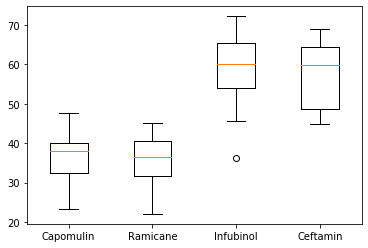

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(GreatestVolume, labels=Treatments)

## Line and Scatter Plots

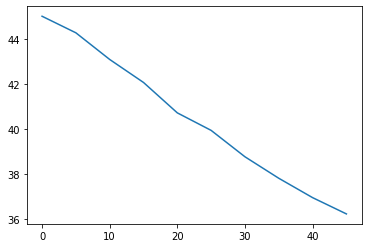

In [31]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin = Clean_df[(Clean_df["Drug Regimen"]=='Capomulin')]
# x = Capomulin['Timepoint']
# y = Capomulin['Tumor Volume (mm3)']
# danger_drop, = plt.plot(x, y, color="blue", label="Danger Drop")
plt.plot(Capomulin.groupby(["Timepoint"]).mean()["Tumor Volume (mm3)"])


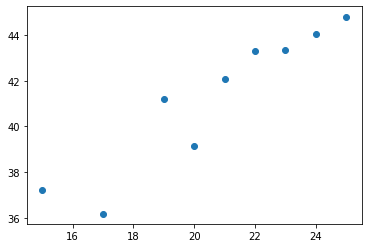

In [45]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin = Clean_df[(Clean_df["Drug Regimen"]=='Capomulin')]
#plt.scatter(Capomulin["Weight (g)"],["Tumor Volume (mm3)"])


plt.scatter(Capomulin["Weight (g)"].unique(),Capomulin.groupby(["Weight (g)"]).mean()["Tumor Volume (mm3)"])

## Correlation and Regression

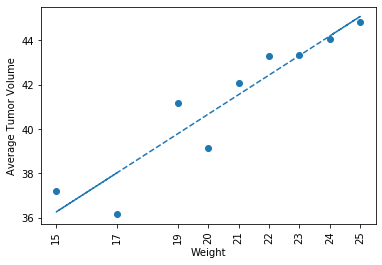

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
round(st.pearsonr(Capomulin["Weight (g)"].unique(),Capomulin.groupby(["Weight (g)"]).mean()["Tumor Volume (mm3)"])[0],2)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(Capomulin["Weight (g)"].unique(),Capomulin.groupby(
                                                                  ["Weight (g)"]).mean()["Tumor Volume (mm3)"])
vc_fit = vc_slope * Capomulin["Weight (g)"].unique() + vc_int

plt.scatter(Capomulin["Weight (g)"].unique(),Capomulin.groupby(["Weight (g)"]).mean()["Tumor Volume (mm3)"])
plt.plot(Capomulin["Weight (g)"].unique(),vc_fit,"--")
plt.xticks(Capomulin["Weight (g)"].unique(), rotation=90)
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()